<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#ВЫВОД." data-toc-modified-id="ВЫВОД.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ВЫВОД.</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Целью моего проекта является нахождение наиболее точной модели для предсказания оттока клиентов из банка.

Для реализации целей проекта я изучу данные на предмет дисбаланса, разобью данные на три выборки: обучающую, валидационную и тестовую, и затем обучу по трем модели по трем видам: Решающее дерево, Случайный лес и Логистическая регрессия.

Затем я буду тестировать данные модели, и выяснять какая из них имеет наилучшее значение местрик F1 и AUC-ROC.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df['Tenure'].isna().sum()

909

In [4]:
df.loc[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Я загрузила данные и пролучила по ним первичную информацию. В колонке количества лет, в течение которых человек является клиентом банка есть 909 пропусков. Три колонки имеют формат object. Графа фамилия не имеет значения для предсказания поведения клиентов, а пол можно заменить на целочислительные показатели (0 и 1).

In [5]:
df['Gender'] = df['Gender'].replace('Female', 0).replace('Male', 1).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


In [6]:
del_col=['RowNumber', 'CustomerId', 'Surname']
df=df.drop(del_col,axis=1)

In [7]:
# Заполняю пропуски 0
df['Tenure']=df['Tenure'].fillna(0).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


## Исследование задачи

Проверяю есть ли в данных дисбаланс.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

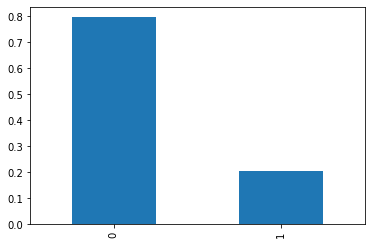

In [8]:
#ОТНОСИТЕЛЬНЫЕ ЧАСТОТЫ С ДИАГРАММОЙ
class_frequency = df['Exited'].value_counts(normalize=True) 
print(class_frequency)
class_frequency.plot(kind='bar')


В данных есть сильный дисбаланс, единичек в четыре раза меньше, чем нулей.

Сначала я обучу три модели на несбалансированных данных, а потом на сбалансированных, чтобы проанализировать разницу результатов.

Применю обработку категориальных данных методом One hot encoder и масштабирование методом StandardScaler.

In [9]:
df_ohe = pd.get_dummies(df, drop_first=True)
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

features_study, features_test, target_study, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_study, target_study, test_size=0.25, random_state=12345)

numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


/tmp/ipykernel_191/1088131950.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_191/1088131950.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

Я создам функции по обучению разных моделей для тогдо чтобы не повторять код при использовании сбанасированных и несбалансированных данных.

Решающее дерево.

In [10]:
def decision_tree (feat, targ, balans):
    best_depth = 0
    best_f1 = 0
    f1_trees = []
    depths = []
    for depth in np.arange(1,21,1):
        model_tree = DecisionTreeClassifier(class_weight=balans, max_depth= depth, random_state=12345) 
        model_tree.fit(feat, targ)
        predicted_valid_t = model_tree.predict(features_valid)
        f1_tree = f1_score(target_valid, predicted_valid_t)
        f1_trees.append(f1_tree)
        depths.append(depth)
        if f1_tree > best_f1:
            best_depth = depth
            best_f1 = f1_tree
            best_model_tree = model_tree
    print('Лучшая глубина', best_depth)
    print('Лучшая метрика F1', best_f1)
    return best_model_tree

In [11]:
decision_tree (features_train, target_train, None)

Лучшая глубина 7
Лучшая метрика F1 0.5488958990536277


DecisionTreeClassifier(max_depth=7, random_state=12345)

Случайный лес. 

In [12]:
def random_forest (feat, targ, balans):
    best_depth = 0
    best_f1 = 0

    for depth in range(2, 22, 2):
        for est in range(50, 351, 50):
            model_rf = RandomForestClassifier(class_weight=balans, max_depth=depth, n_estimators=est, random_state=12345) 
            model_rf.fit(feat, targ)
            predicted = model_rf.predict(features_valid)
            f1_tree = f1_score(target_valid, predicted)

            if f1_tree > best_f1:
                best_depth = depth
                best_est = est
                best_f1 = f1_tree
                best_model_rf = model_rf

    print('Лучшая глубина', best_depth)
    print('Лучшее количество деревьев', best_est)
    print('Лучшая метрика F1', best_f1)
    return best_model_rf

In [13]:
random_forest (features_train, target_train, None)

Лучшая глубина 20
Лучшее количество деревьев 50
Лучшая метрика F1 0.5791139240506329


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=12345)

Логистическая регрессия.

In [14]:
def logistic_regression (feat, targ, balans):
    model_log = LogisticRegression(class_weight=balans, multi_class='ovr', random_state=12345, solver='liblinear')
    model_log.fit(feat, targ)
    predicted_valid = model_log.predict(features_valid)
    f1_log = f1_score(target_valid, predicted_valid)
    print(f1_log)
    return model_log

In [15]:
logistic_regression(features_train, target_train, None)

0.0


LogisticRegression(multi_class='ovr', random_state=12345, solver='liblinear')

Без балансировки данных не удалось достичь показателя метрики F1 больше, чем 0.59.

## Борьба с дисбалансом

Воспользуемся функцией Upsampling и увеличим количество клиентов оттока(target==1).

In [16]:
def upsample(features, target, repeat):
    #Разделяем выборку по значениям целевой функции
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    #Увеличиваем, соединяем обратно и перемешиваем
    features_up = shuffle(pd.concat([features_zeros] + [features_ones] * repeat), random_state=12345)
    target_up = shuffle(pd.concat([target_zeros] + [target_ones] * repeat), random_state=12345)
    
    return features_up, target_up

In [17]:
features_up, target_up = upsample(features_train, target_train, 4)

Обучение моделей на сбалансированных данных с использованием метода Upsampling.

Решающее дерево плюс Upsampling.

In [18]:
decision_tree (features_up, target_up, None)

Лучшая глубина 6
Лучшая метрика F1 0.5572441742654509


DecisionTreeClassifier(max_depth=6, random_state=12345)

Слуйчайный лес плюс Upsampling.

In [19]:
random_forest (features_up, target_up, None)

Лучшая глубина 10
Лучшее количество деревьев 150
Лучшая метрика F1 0.6018306636155607


RandomForestClassifier(max_depth=10, n_estimators=150, random_state=12345)

Логистическая регрессия плюс Upsampling.

In [20]:
logistic_regression(features_up, target_up, None)

0.4860627177700349


LogisticRegression(multi_class='ovr', random_state=12345, solver='liblinear')

<b>Воспользуемся функцией Downsampling и увеличим количество клиентов оттока(target==1).<b/>

In [21]:
def downsample(features, target, fraction):
   
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
   
    features_dn = shuffle(pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]), random_state=12345)

    target_dn = shuffle(pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]), random_state=12345)

    
    return features_dn, target_dn

In [22]:
features_dn, target_dn = downsample(features_train, target_train, 0.4)

<b>Обучение моделей на сбалансированных данных с использованием метода Downsampling.<b/>

Решающее дерево плюс Downsampling.

In [23]:
decision_tree (features_dn, target_dn, None)

Лучшая глубина 5
Лучшая метрика F1 0.5693069306930693


DecisionTreeClassifier(max_depth=5, random_state=12345)

Случайный лес плюс Downsampling.

In [24]:
random_forest (features_dn,target_dn, None)

Лучшая глубина 10
Лучшее количество деревьев 150
Лучшая метрика F1 0.5944645006016848


RandomForestClassifier(max_depth=10, n_estimators=150, random_state=12345)

Логистическая регрессия плюс Downsampling.

In [25]:
logistic_regression(features_dn, target_dn, None)

0.0


LogisticRegression(multi_class='ovr', random_state=12345, solver='liblinear')

<b>Применю еще один способ балансировки данных class_weight='balanced' и посмотрю, как меняется целевая метрика.<b/>

In [26]:
decision_tree (features_up, target_up, 'balanced')

Лучшая глубина 6
Лучшая метрика F1 0.5572441742654509


DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)

In [27]:
decision_tree (features_dn, target_dn, 'balanced')

Лучшая глубина 6
Лучшая метрика F1 0.5540796963946869


DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)

In [28]:
random_forest (features_up, target_up, 'balanced')

Лучшая глубина 16
Лучшее количество деревьев 150
Лучшая метрика F1 0.6034712950600801


RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=150,
                       random_state=12345)

In [29]:
random_forest (features_dn,target_dn, 'balanced')

Лучшая глубина 20
Лучшее количество деревьев 300
Лучшая метрика F1 0.5886524822695036


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=300,
                       random_state=12345)

In [30]:
logistic_regression(features_up, target_up, 'balanced')

0.4761904761904761


LogisticRegression(class_weight='balanced', multi_class='ovr',
                   random_state=12345, solver='liblinear')

In [31]:
logistic_regression(features_dn, target_dn, 'balanced')

0.48452696728558803


LogisticRegression(class_weight='balanced', multi_class='ovr',
                   random_state=12345, solver='liblinear')

<b>На сбалансированных данных я нашла наилучшую по метрике F1 = 0.6, которую удалось достичь с импользованием данных обработанных методом Upsampling модели Случайный лес с параметрами количества деревьев 150 и глубиной 16.</b>

## Тестирование модели

<b>По условиям задачи мне необходимо исследовать не только метрику F1, но метрики ROC-кривая и AUC-ROC. <b/>

<b>Изучу метрики ROC-кривая и AUC-ROC для всех моделей с их лучшими параметрами. <b/>

In [32]:
def proba (model, feat_test, tar_test):
    probabilities_test = model.predict_proba(feat_test)
    probabilities_one_test = probabilities_test[:, 1]

    fpr, tpr, thresholds = roc_curve(tar_test, probabilities_one_test) 

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
    auc_roc = roc_auc_score(tar_test, probabilities_one_test)
    print(f'Метрика AUC-ROC модели {model} на сбалансированных данных', auc_roc)

In [33]:
model_tree = DecisionTreeClassifier(class_weight='balanced', max_depth= 6, random_state=12345) 
model_tree.fit(features_up, target_up)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)

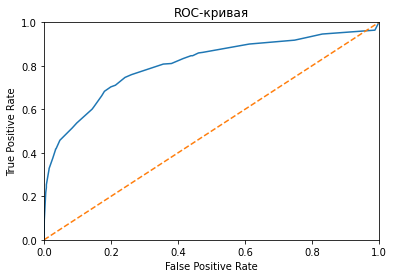

Метрика AUC-ROC модели DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345) на сбалансированных данных 0.8063649325485321


In [34]:
proba (model_tree, features_valid, target_valid)

In [35]:
model_rf = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=150, random_state=12345) 
model_rf.fit(features_up, target_up)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=150,
                       random_state=12345)

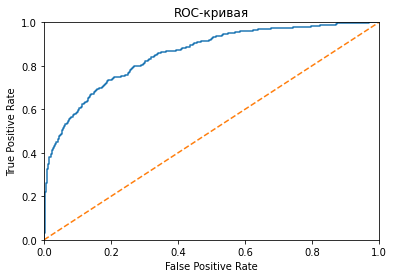

Метрика AUC-ROC модели RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=150,
                       random_state=12345) на сбалансированных данных 0.8536954057976313


In [36]:
proba (model_rf, features_valid, target_valid)

In [37]:
model_log = LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=12345, solver='liblinear')
model_log.fit(features_dn, target_dn)

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   random_state=12345, solver='liblinear')

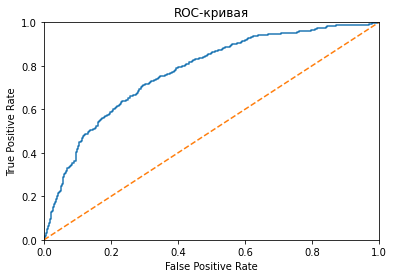

Метрика AUC-ROC модели LogisticRegression(class_weight='balanced', multi_class='ovr',
                   random_state=12345, solver='liblinear') на сбалансированных данных 0.7718078773650137


In [38]:
proba (model_log, features_valid, target_valid)

<b>Самой высокой метрика AUC-ROC оказалась у той же модели, что и метрика F1/</b>

<b>На сбалансированных данных я нашла наилучшую по метрике F1 = 0.6, которую удалось достичь с импользованием данных обработанных методом Upsampling модели Случайный лес с параметрами количества деревьев 150 и глубиной 10.<b/>

<b>Лучшую модель я протестирую на тестовой выборке. <b/>

In [39]:
best_model_b = RandomForestClassifier(class_weight='balanced', n_estimators=150, max_depth=16, random_state=1234)
best_model_b.fit(features_up, target_up)
pred = best_model_b.predict(features_test)
f1_score(target_test, pred)

0.6052963430012609

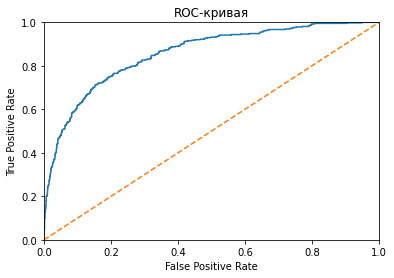

Метрика AUC-ROC модели RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=150,
                       random_state=1234) на сбалансированных данных 0.8568346705455498


In [40]:
proba (best_model_b, features_test, target_test)

## ВЫВОД.

<b>Я загрузила и изучила данные, закодировала признак пол для целей обучения.

При изучении данных я обнаружила значительный дисбаланс классов в целевом признаке.
    
Для проведения исследования качества обучаения моделей я разбила базу данных на три выборки: обучающую, валидационную и тестовую.

Для начала обучила три модели на несбалансированных данных, и результат оказался неудовлетворительным.

После балансировки данных методами upsampled и downsampling я снова обучила модели уже на сбаласированных данных.
    
Я применила еще один метод борьбы с дисбалансом class_weight, с применением которго модели Случайный лес с параметрами глубины 10 и количеством деревьев 150 удалось достичь метрику f1=0,6, что выше чем необходимое по условию задачи значение 0,59.
    
Такой же высокий показатель метрики получилось достичь и на тестовой выборке.

Также я исследовала метрику AUC-ROC с построение ROC-кривой, из результатов было видно, что, чем выше одна метрика, тем выше и другая и выше способность модели к точности прогнозирования.
    
Следовательно в данной ситуации модель Случайный лес с гиперпараметрами количества деревьев 150 и глубиной 10 является наиболее эффективной для предсказания поведения клиентов, и именно ее можно использовать банку для прогнозирования оттока.